In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# 코인데스크 사이트에서 1년치 비트코인 가격 데이터 읽기
f=open("BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv","r")
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)']].to_numpy() # 종가만 취함

In [17]:
# 시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

In [18]:
w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y=seq2dataset(seq,w,h)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [20]:
# 훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

In [21]:
# LSTM 모델 설계와 학습
model=Sequential()
# 첫번째 층이라 input_shape 을 통해 샘플의 텐서 모양을 알려주어야 함.
# x_train은 여러 샘플로 구성된 훈련집합이며, 그 중 아무 샘플이나 뽑아 그 모양으로 설정하면 됨. 여기서는 0번 샘플을 사용하였음.
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
# 출력이 한개 뿐이므로 Dense 인자를 1로 설정함.
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

Epoch 1/200
250/250 - 2s - loss: 2068.3557 - mae: 2068.3557 - val_loss: 1323.9073 - val_mae: 1323.9073 - 2s/epoch - 10ms/step
Epoch 2/200
250/250 - 1s - loss: 775.4403 - mae: 775.4403 - val_loss: 370.8457 - val_mae: 370.8457 - 682ms/epoch - 3ms/step
Epoch 3/200
250/250 - 1s - loss: 610.7242 - mae: 610.7242 - val_loss: 454.9015 - val_mae: 454.9015 - 731ms/epoch - 3ms/step
Epoch 4/200
250/250 - 1s - loss: 608.3342 - mae: 608.3342 - val_loss: 393.1038 - val_mae: 393.1038 - 691ms/epoch - 3ms/step
Epoch 5/200
250/250 - 1s - loss: 581.2133 - mae: 581.2133 - val_loss: 503.6773 - val_mae: 503.6773 - 683ms/epoch - 3ms/step
Epoch 6/200
250/250 - 1s - loss: 600.8888 - mae: 600.8888 - val_loss: 406.5119 - val_mae: 406.5119 - 683ms/epoch - 3ms/step
Epoch 7/200
250/250 - 1s - loss: 638.0137 - mae: 638.0137 - val_loss: 350.4763 - val_mae: 350.4763 - 684ms/epoch - 3ms/step
Epoch 8/200
250/250 - 1s - loss: 563.7673 - mae: 563.7673 - val_loss: 359.4940 - val_mae: 359.4940 - 709ms/epoch - 3ms/step
Epoch 

Epoch 67/200
250/250 - 1s - loss: 283.6669 - mae: 283.6669 - val_loss: 241.3923 - val_mae: 241.3923 - 712ms/epoch - 3ms/step
Epoch 68/200
250/250 - 1s - loss: 274.1666 - mae: 274.1666 - val_loss: 196.6062 - val_mae: 196.6062 - 718ms/epoch - 3ms/step
Epoch 69/200
250/250 - 1s - loss: 262.1338 - mae: 262.1338 - val_loss: 184.8681 - val_mae: 184.8681 - 736ms/epoch - 3ms/step
Epoch 70/200
250/250 - 1s - loss: 258.5990 - mae: 258.5990 - val_loss: 170.5489 - val_mae: 170.5489 - 730ms/epoch - 3ms/step
Epoch 71/200
250/250 - 1s - loss: 270.1398 - mae: 270.1398 - val_loss: 188.0296 - val_mae: 188.0296 - 770ms/epoch - 3ms/step
Epoch 72/200
250/250 - 1s - loss: 276.3477 - mae: 276.3477 - val_loss: 173.6061 - val_mae: 173.6061 - 727ms/epoch - 3ms/step
Epoch 73/200
250/250 - 1s - loss: 267.9474 - mae: 267.9474 - val_loss: 173.2772 - val_mae: 173.2772 - 713ms/epoch - 3ms/step
Epoch 74/200
250/250 - 1s - loss: 274.0763 - mae: 274.0763 - val_loss: 170.9728 - val_mae: 170.9728 - 736ms/epoch - 3ms/step


Epoch 133/200
250/250 - 1s - loss: 248.6943 - mae: 248.6943 - val_loss: 176.2031 - val_mae: 176.2031 - 804ms/epoch - 3ms/step
Epoch 134/200
250/250 - 1s - loss: 249.3545 - mae: 249.3545 - val_loss: 167.4863 - val_mae: 167.4863 - 715ms/epoch - 3ms/step
Epoch 135/200
250/250 - 1s - loss: 258.4061 - mae: 258.4061 - val_loss: 171.2427 - val_mae: 171.2427 - 729ms/epoch - 3ms/step
Epoch 136/200
250/250 - 1s - loss: 250.9235 - mae: 250.9235 - val_loss: 168.6652 - val_mae: 168.6652 - 741ms/epoch - 3ms/step
Epoch 137/200
250/250 - 1s - loss: 248.0269 - mae: 248.0269 - val_loss: 257.8477 - val_mae: 257.8477 - 731ms/epoch - 3ms/step
Epoch 138/200
250/250 - 1s - loss: 256.7868 - mae: 256.7868 - val_loss: 171.7944 - val_mae: 171.7944 - 704ms/epoch - 3ms/step
Epoch 139/200
250/250 - 1s - loss: 246.3044 - mae: 246.3044 - val_loss: 169.7418 - val_mae: 169.7418 - 673ms/epoch - 3ms/step
Epoch 140/200
250/250 - 1s - loss: 258.7714 - mae: 258.7714 - val_loss: 181.0407 - val_mae: 181.0407 - 698ms/epoch - 3

250/250 - 1s - loss: 249.5966 - mae: 249.5966 - val_loss: 166.2677 - val_mae: 166.2677 - 774ms/epoch - 3ms/step
Epoch 199/200
250/250 - 1s - loss: 257.4389 - mae: 257.4389 - val_loss: 171.6177 - val_mae: 171.6177 - 724ms/epoch - 3ms/step
Epoch 200/200
250/250 - 1s - loss: 256.4807 - mae: 256.4807 - val_loss: 166.8508 - val_mae: 166.8508 - 711ms/epoch - 3ms/step


In [22]:
# LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0],"MAE:",ev[1])
# if MAE = 172.1, then 평균 172.1 달러 정도의 오차가 있다는 뜻임.

손실 함수: 166.85072326660156 MAE: 166.85072326660156


In [23]:
# LSTM 모델로 예측 수행
pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))
# if MAPE = 0.0208, then 평균 2.08% 가량의 예측오차가 있다는 뜻임.

4/4 [==============================] - 0s 4ms/step
평균절댓값백분율오차(MAPE): [0.02008671]


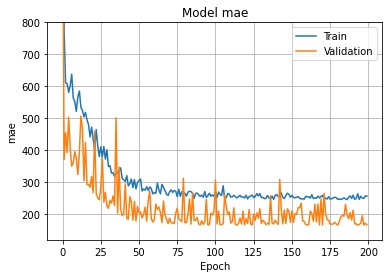

In [24]:
# 학습 곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

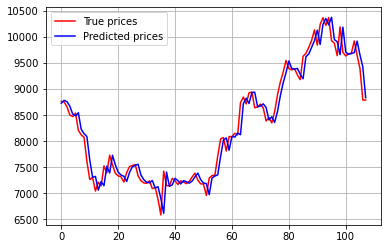

In [25]:
# 예측 결과 시각화
x_range=range(len(y_test))
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

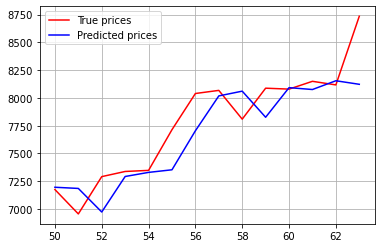

In [26]:
# 일부 구간을 확대하여 시각화
x_range=range(50,64)
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()